In [1]:
import pandas as pd

df = pd.read_csv("Dataset .csv")   # example: zomato.csv
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Count how many times each restaurant name appears
restaurant_counts = df['Restaurant Name'].value_counts()

# Filter restaurants that appear more than once (chains)
restaurant_chains = restaurant_counts[restaurant_counts > 1]
print("Restaurant chains and their number of outlets:\n", restaurant_chains)


Restaurant chains and their number of outlets:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
San Carlo            2
Gymkhana             2
Dishoom              2
Timboo Cafe          2
D�_vero��lu          2
Name: count, Length: 734, dtype: int64


In [3]:
# Filter dataset for chains only
chains_df = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Calculate average rating and number of votes per chain
chain_stats = chains_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'City': 'count'  # number of outlets
}).rename(columns={'City': 'Number of Outlets'})

# Sort by average rating
chain_stats_sorted = chain_stats.sort_values(by='Aggregate rating', ascending=False)
print("Chains sorted by average rating:\n", chain_stats_sorted.head(10))


Chains sorted by average rating:
                            Aggregate rating  Votes  Number of Outlets
Restaurant Name                                                      
Talaga Sampireun                      4.900   5514                  3
Silantro Fil-Mex                      4.850   1364                  2
AB's Absolute Barbecues               4.850   3151                  2
AB's - Absolute Barbecues             4.825  13400                  4
Naturals Ice Cream                    4.800   3094                  2
Gymkhana                              4.700    328                  2
The Cheesecake Factory                4.650   3010                  2
Garota de Ipanema                     4.600     59                  2
Dishoom                               4.600   1269                  2
Chili's                               4.580   8156                  5


In [4]:
# Top 10 most popular chains by votes
top_chains_votes = chain_stats.sort_values(by='Votes', ascending=False).head(10)
print("Top 10 chains by total votes:\n", top_chains_votes)


Top 10 chains by total votes:
                            Aggregate rating  Votes  Number of Outlets
Restaurant Name                                                      
Barbeque Nation                    4.353846  28142                 26
AB's - Absolute Barbecues          4.825000  13400                  4
Big Chill                          4.475000  10853                  4
Farzi Cafe                         4.366667  10098                  6
Truffles                           3.950000   9682                  2
Chili's                            4.580000   8156                  5
Joey's Pizza                       4.250000   7807                  2
Big Yellow Door                    4.266667   7511                  3
Saravana Bhavan                    4.133333   7238                  3
Starbucks                          3.805556   7139                 18


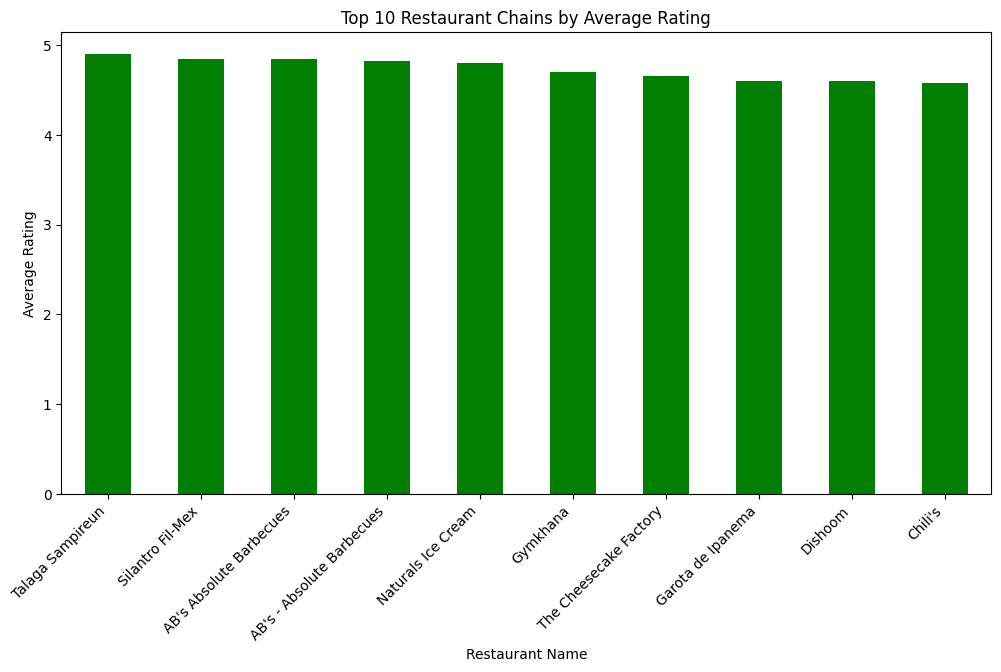

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
chain_stats_sorted['Aggregate rating'].head(10).plot(kind='bar', color='green')
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=45, ha='right')
plt.show()


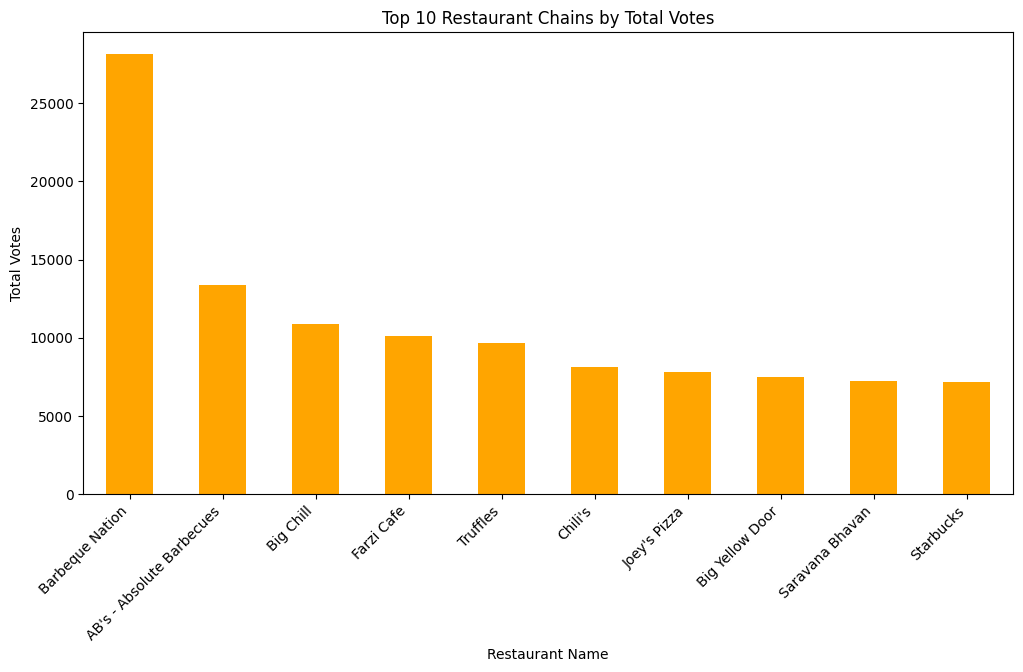

In [6]:
plt.figure(figsize=(12,6))
top_chains_votes['Votes'].plot(kind='bar', color='orange')
plt.title('Top 10 Restaurant Chains by Total Votes')
plt.ylabel('Total Votes')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=45, ha='right')
plt.show()


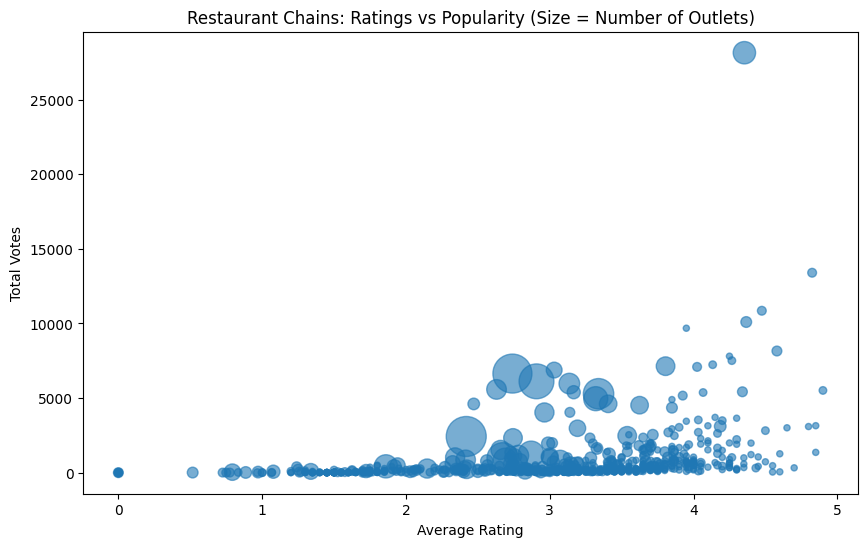

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(chain_stats['Aggregate rating'], chain_stats['Votes'], s=chain_stats['Number of Outlets']*10, alpha=0.6)
plt.xlabel('Average Rating')
plt.ylabel('Total Votes')
plt.title('Restaurant Chains: Ratings vs Popularity (Size = Number of Outlets)')
plt.show()


1.Chains with highest average ratings → quality-focused chains.

2.Chains with highest votes → most popular chains.

3.Number of outlets indicates geographic presence.